<a href="https://colab.research.google.com/github/mandoo2/tensorflow/blob/main/tensorflow221110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

# Helper libraries
# numpy와 matplotlib을 사용한다.
import numpy as np
import matplotlib.pyplot as plt
# jupyter notebook에서 matplotlib을 사용하기 위한 매직커맨드
%matplotlib inline
print("사용되는 tensorflow의 버전:",tf.__version__)

사용되는 tensorflow의 버전: 2.9.2


In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
fashion_mnist = keras.datasets.fashion_mnist


In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape


(60000, 28, 28)

In [8]:
test_images.shape


(10000, 28, 28)

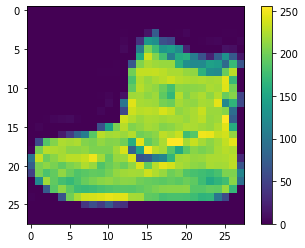

In [9]:
# matplotlib을 통해 그림을 그린다.
plt.figure()
# train_images의 첫번째 요소를 그린다.
plt.imshow(train_images[0])
plt.colorbar()
# 점자선을 False로 둠으로써 없앤다.
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

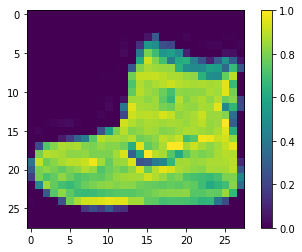

In [11]:
# matplotlib을 통해 그림을 그린다.
plt.figure()
# train_images의 첫번째 요소를 그린다.
plt.imshow(train_images[0])
plt.colorbar()
# 점자선을 False로 둠으로써 없앤다.
plt.gca().grid(False)

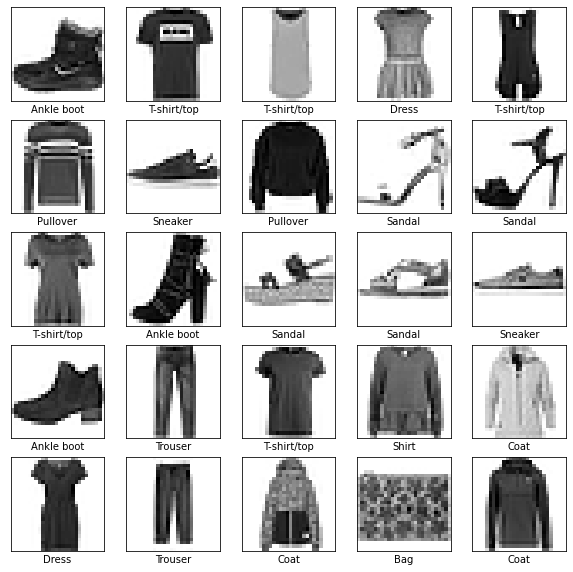

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4990 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3774 - acc: 0.8640
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3394 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3141 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2966 - acc: 0.8917


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Test accuracy: 0.8608


In [17]:
predictions = model.predict(test_images)


In [18]:
predictions[0]


array([1.0199580e-05, 1.5158456e-08, 5.2820411e-07, 3.4192571e-08,
       4.6271040e-07, 2.8251279e-03, 7.9944575e-06, 3.6351003e-02,
       1.9702791e-05, 9.6078485e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]


9

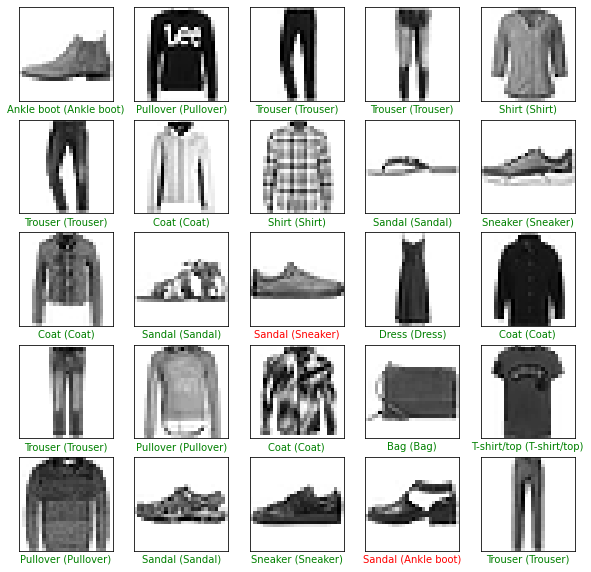

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # predictions에서 가장 큰 값을 predicted_label 로 가져온다.
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    # 이때 실제 test_label과 일치하면 초록색 글씨로,
    if predicted_label == true_label:
      color = 'green'
    # 일치하지 않으면 빨간색 글씨로 출력한다.
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)